# Project steps
 1. Load the data
 2. Analyze and visualize the dataset
 3. Model training.
 4. Model Evaluation.
 5. Testing the model.

Dataset to be used taken from https://www.kaggle.com/datasets/uciml/iris

In [55]:
# importing packages to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
Firstly we will load the raw dataset and take a look at some values, column names etc to get an overall picture of what the dataset looks like. We can then perform any necessary updates such as renaming columns.

In [42]:
df = pd.read_csv('iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We will rename the columns to make them more readable and also update them to remove the Cm from the lengths and widths. We will also rename the species column to be classification. The ultimate goal is for the model to predict the classification based on the features of the flower.

In [43]:
df = df.rename(columns={"Id": "ID", "SepalLengthCm" : "Sepal length", "SepalWidthCm" : "Sepal width", "PetalLengthCm" : "Petal length", "PetalWidthCm" : "Petal width", "Species": "Classification"})

# Analysing the dataset
We can visualise the dataset in a descriptive table using the handily named _describe_ method provided by the pandas package. This provides useful information for some datasets and provides a high-level view of the data. For this dataset, we can see average lengths/widths as well as the maximum and minimum values of the features.

In [44]:
df.describe()

,ID,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualising the datset
Another useful step in data science projects is to visualise the data. This allows you to spot patterns and understand the data further than just using the describe method as implemented above. For this step, we will use seaborn; a powerful package for creating data visualisations with colourful plots.

We will use the pairplot function from seaborn to create plots to identify relationships between different features. We can pass the hue argument to the pairplot method which allows us to visualise which point relates to which classification of flower.

This is a great tool for the beginning of machine learning projects as you can identify useful features that can be used in your machine learning algorithms which can help with classifications.

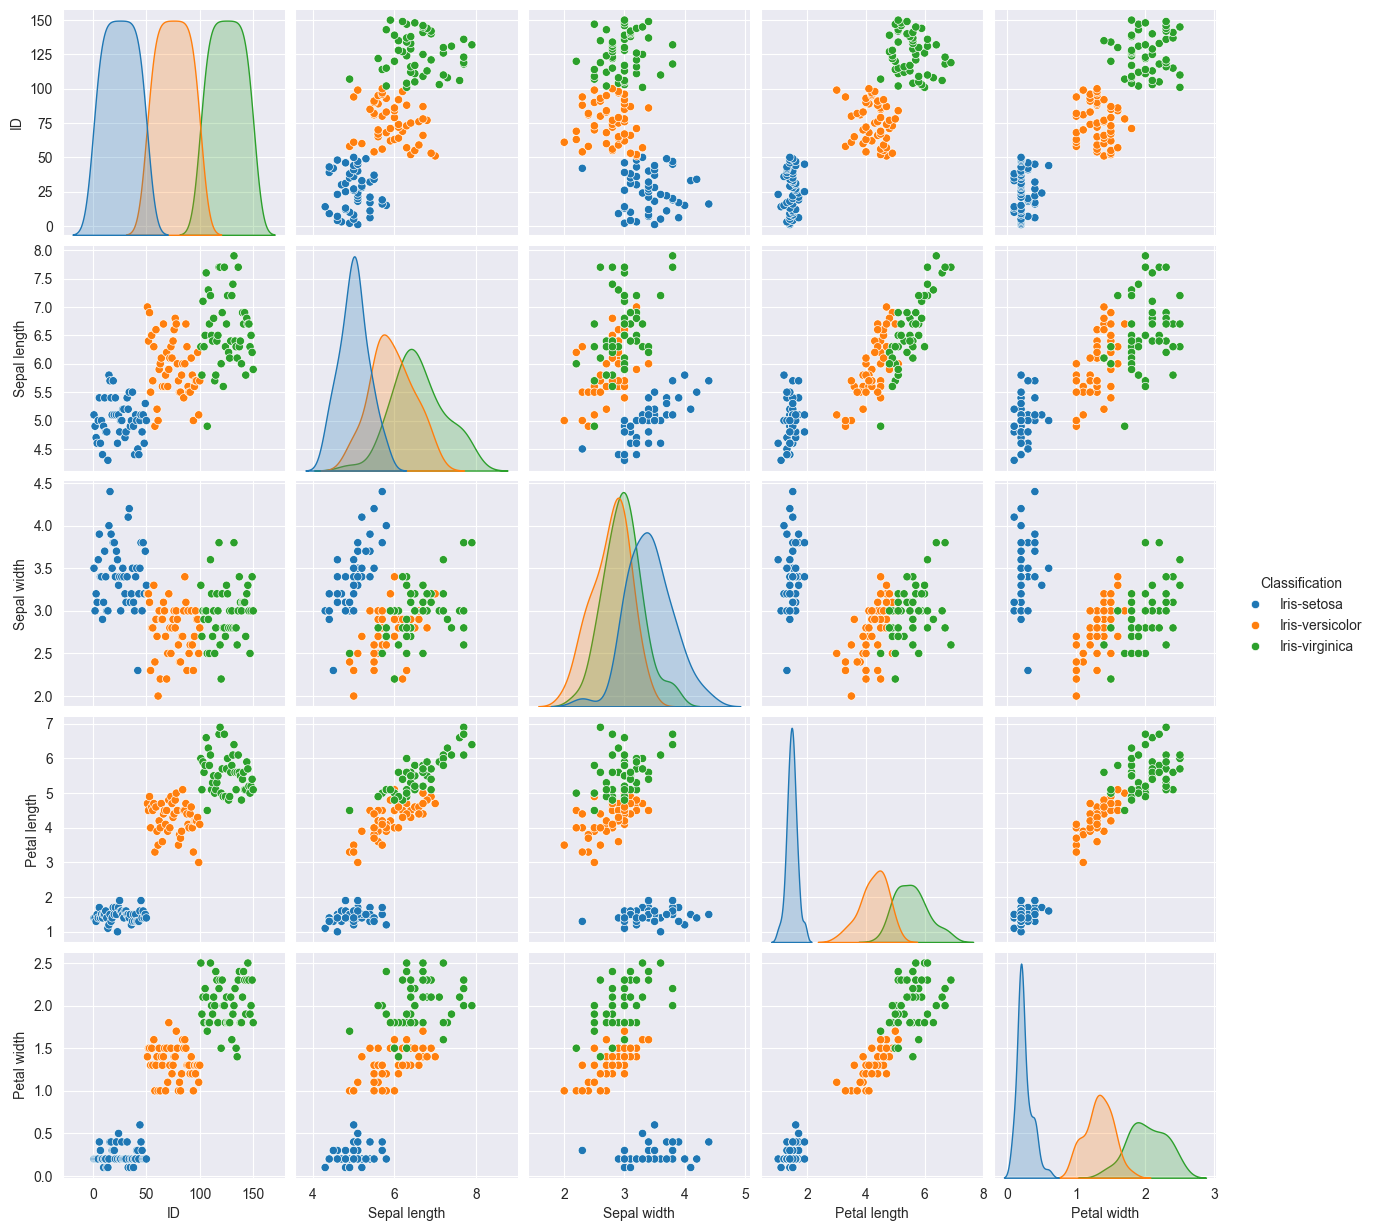

In [45]:
sns.pairplot(df, hue="Classification")

From the above plots we can see that Iris-setosa may be easy to classify as it's data points seem relatively separated from the other two types of flower.

In the table provided by the describe method we are able to see the average legths and widths of all entries of the dataset. It would be more useful to see the average length and widths of the features for each classification of flower.

Pandas allows us to easily group our data using the groupby method. We can then perform some common arithmetic functions on the dataset such as .mean to get a mean value of all the features. By passing numeric_only=True as the arguement this ensures the function works correctly without trying to take the mean of the classification column which includes strings.

In [46]:
mean_by_species = df.groupby("Classification").mean(numeric_only=True)
mean_by_species

,ID,Sepal length,Sepal width,Petal length,Petal width
Classification,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


Now we have the means of each feature for each classification we can visualise this in a bar graph using another powerful data visualisation package called matplotlib. Firstly, we need to transpose the data as we would like the features to be in the row and the classifications to be in the columns. This will make is easier to plot later.

As this is a common task in data science, pandas includes the .T method which allows us to easily transpose the dataframe with each row as the new column names.

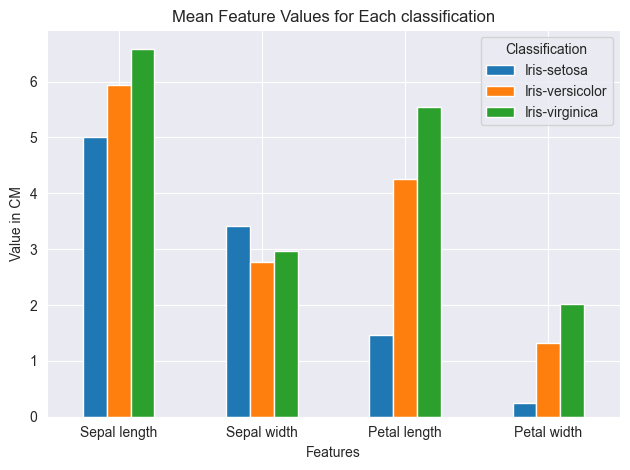

In [47]:
# plot the average
# transpose the mean_by_species so that features are along the x axis
mean_features_T = mean_by_species.drop(columns="ID").T
mean_features_T.plot(kind="bar")
# Set a title for the graph and x and y-axis labels
plt.title("Mean Feature Values for Each classification")
plt.ylabel("Value in CM")
plt.xlabel("Features")
plt.xticks(rotation=0) # useful for rotating the feature names label text to be horizontal
plt.legend(title="Classification")
plt.tight_layout()
plt.show()


From this visualisation we can easily see that the setosa has the smallest Sepal length, petal length and petal width and similarly the virginica is the largest in all feature.

# Training the Model
We can now start training a ML model to help us classify the flowers based on the characteristics of their features.

We will use the package scikit-learn (sklearn) for our model training as it includes some powerful premade algorithms for machine learning tasks.

When training ML models it is important to only provide a selection of the total dataset to the model. If we provided all the data to the model, it would result in a highly accurate model that works well on the test set but not on new unseen values. This is called *overfitting* and means that the model does not generalise well for new data.

We will split our dataset in an 80:20 ratio, where 80% of the dataset is used for training the model and the other 20% will remain unseen and used to test how well the model correctly classifies this unseen 20%.

scikit learn provides us with a great function for accomplishing this training/testing datasets with the aptly named train_test_split.

The test_size parameter is used for the % of the dataset to be used for testing.

The random_state parameter allows us to reproduce these exact same training/test sets which is useful if we want to use this same set to train a different algorithm and compare which works best.

The stratify parameter ensures that each classification is represented proportionally in both the train and test sets.

In [48]:
from sklearn.model_selection import train_test_split
# Features X and target y
X = df.drop(columns=["ID", "Classification"])  # Features
y = df["Classification"]                       # Target variable (what we want to predict)

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Now we have split our data, we need to decide on the type of model/algorithm we want to use. There are many models available within sklearn. We will implement a few to compare their effectiveness on our given dataset.

We will implement the following supervised learning models:
- Logistic regression
- SVM (Support Vector Machine)
- Random Forest

A supervised model learns by using labelled examples. Imagine we are teaching a child about animals, we may hold up images of different cats and dogs and tell the child which animal is in the image. Eventually the child should learn from you telling it and would be able to identify new examples without us giving it the answer.

An unsupervised model doesn't get labelled examples. Returning to our previous analogy, we could show the child images and the child may put them into separate piles based on certain characterists of the image. The child would not necessarily know that the images are "cats" and "dogs" but would *hopefully* be able to put new unseen examples into the correct categories.


In [49]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model_pred = logistic_model.predict(X_test)

In [50]:
logistic_score = accuracy_score(y_test, logistic_model_pred)
logistic_report = classification_report(y_test, logistic_model_pred)
logistic_score

0.9666666666666667

In [51]:
# SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_model_pred = svc_model.predict(X_test)
svc_score = accuracy_score(y_test, svc_model_pred)
svc_report = classification_report(y_test, svc_model_pred)
svc_score

0.9666666666666667

In [52]:
# random forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_model_pred = random_forest_model.predict(X_test)
random_forest_score = accuracy_score(y_test, random_forest_model_pred)
random_forest_report = classification_report(y_test, random_forest_model_pred)
random_forest_score


0.9333333333333333

You could also use the classification report to see more detailed information about how well the model predicts each classification.

In [53]:
print(random_forest_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# Analysing our models

After creating three separate models to predict the flowers using different algorithms we can compare the accuracy of each.

This is a fairly simple and limited dataset and each of the models are able to predict the flowers with a 96% accuracy*.

*The random forest may have slightly different results because it, as the name suggests, is random and does not follow the same strict sequential procedures as both logistic regression and SVM. We could make Random forest produce the same result each time by once again passing the random_state parameter to the RandomForestClassifier() function to be able to replicate the results consistently. However, for this demonstration we have chosen to omit the random_state to highlight the randomness of the model.



# Saving the model
Usually, models are created to be used to solve business problems. It would be ideal to be able to save this model so that it can run in other places other than inside this notebook.

This can be done in a variety of ways. Two of the most popular are pickle and joblib.

Below is how we would save the model and load the model inside another program.


In [54]:
# Save to file
import joblib
joblib.dump(random_forest_model, "random_forest_model.pkl")

# Load from file
model_loaded = joblib.load("random_forest_model.pkl")